# Black Friday - Purchase Predictions

Data is from here: https://datahack.analyticsvidhya.com/contest/black-friday/

This dataset is about predicting product purchase volume

In [1]:
import pandas as pd

df = pd.read_csv('data/black-friday.csv')

## Dataset overview

Let's start with a basic overview of the dataset, how many data points are there and which columns do we have?

In [2]:
df.shape

(550068, 12)

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


So we have little over half a million of datapoints and 12 columns of features concerning each data point.

It also seems there is a mix of numerical and categorical columns. Let's inspect columns types a little closer:

In [15]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

So there is mostly categorical ('object' / 'int64') type columns, we can also easily spot those in the first few rows of the dataset printed at the top. 

In [18]:
df[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
    'Marital_Status', 'Product_Category_1']].nunique()

User_ID                       5891
Product_ID                    3631
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              20
dtype: int64

Most of the columns have a quite limited set of possible values, so we can make some quick plots to have a look at relations with the explained variable (Purchase).

## Data visualisations

In this section we'll do some data visualisation to get a quick overview of the dataset and relations

In [24]:
import seaborn as sns

%matplotlib inline

### Purchase amount

This is the explained variable - let's see what range of values we're predicting?

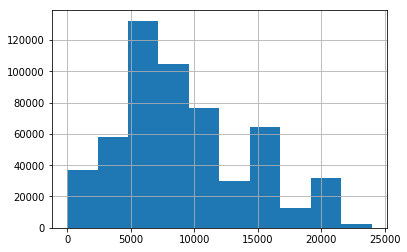

In [25]:
df['Purchase'].hist()

Distribution is somewhat skewed, and with interesting peaks around 15k and 20k. Could those be favorite order quantities?

### Gender

Now let's have a look at gender and the relation with Purchase. Are women of males bigger spenders?

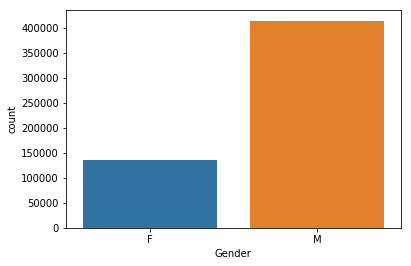

In [26]:
sns.countplot(data=df, x='Gender')

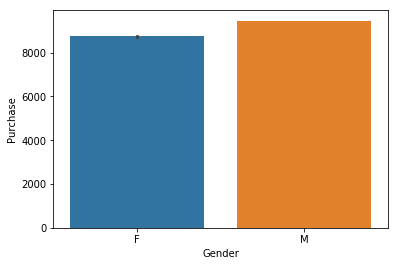

In [19]:
sns.barplot(data=df, x='Gender', y='Purchase')

It seems this store has much more males purchasing products than females. Also the males are the bigger spenders. 

### Marital Status

Now we'll have a look at the marital status. Same questions as for Gender - how are values distributed and what is the relation with Purchase quantity?

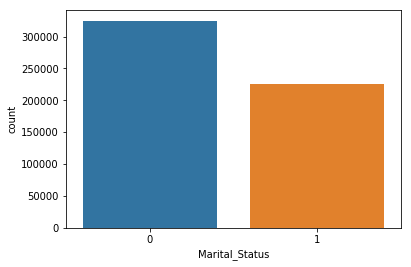

In [28]:
sns.countplot(data=df, x='Marital_Status')

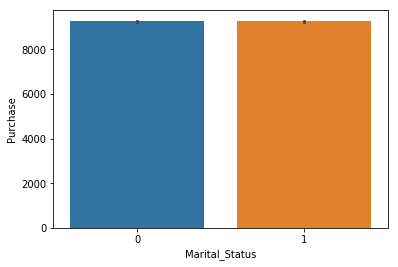

In [5]:
sns.barplot(data=df, x='Marital_Status', y='Purchase')

The majority of customers isn't married, also there seems to be little relation with Purchase volume.

### Age Group

I'm curious what the ages of customes are and what the relation with purchase behavior is?

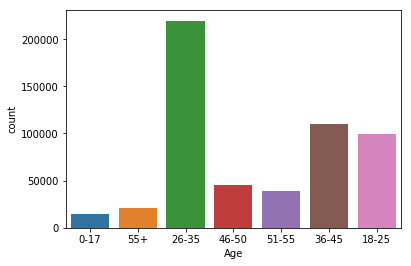

In [29]:
sns.countplot(data=df, x='Age')

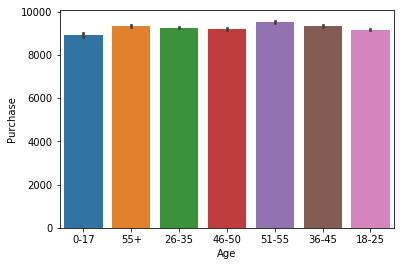

In [6]:
sns.barplot(data=df, x='Age', y='Purchase')

We can see from the plots that the age groups 18-25, 26-35 and 36-45 (especially 26-35) are the majority of customers of this store. Could be due to type of product, could be due to preference of shopping online vs offline?

The relation with purchasing behavior seems limited, but existant nonetheless.

### Remaining columns

There is a few more columns to investigate, however i'm not going to repeat the charts for all of them. Those can be plotted and analysed in the same way of course.

* City_Category
* Stay_In_Current_City_Years
* Occupation
* Product_Category_1

## Statistical testing

In the last section we plotted the data and visually analyzed distribution and relations. Now we'll have a look at statistical tests to confirm our hypotheses are supported by the data..

### Gender

First hypotheses we'll look at is regarding Gender:

* **Hypothesis** : Purchase behavior differs between males and females
* **Alternate Hypothesis** : Purchase behavior is the same between males and females

To (dis-)confirm this hypothesis we'll use a T-Test.

In [30]:
from scipy.stats import ttest_ind, f_oneway

ttest_ind(df[df['Gender'] == 'M']['Purchase'].values,
          df[df['Gender'] == 'F']['Purchase'].values)

Ttest_indResult(statistic=44.837957934353966, pvalue=0.0)

So the test confirms, there is inded a difference in spending behavior. The pvalue of 0.0 tells us that it is very unlikely that we'd observe this above kind of difference in spending behavior purely by chance. The difference in spending behavior is significant.

### Marital status

* **Hypothesis** : Purchase behavior differs between married and unmarried people
* **Alternate Hypothesis** : Purchase behavior is the same for married and unmarried people

To (dis-)confirm this hypothesis we'll use a T-Test. 

In [31]:
ttest_ind(df[df['Marital_Status'] == 0]['Purchase'].values,
          df[df['Marital_Status'] == 1]['Purchase'].values)

Ttest_indResult(statistic=0.3436698055440526, pvalue=0.7310947525758316)

So here we accept the alternate hypotheses, there appears to be no difference in spending between married and unmarried people. The p-value of 0.73 tells us that there is 73% chance of observice this difference in spending behavior purely by chance. So the difference is not significant.

### Age Group

As last example let's have a look at the diffences between age groups.

* **Hypothesis** : The purchase amount differs between age groups
* **Alternate Hypothesis** : The purchase amount is equal between age groups

For this test we need to do an ANOVA test because there is more than two groups to compare.

In [14]:
f_oneway(df[df['Age'] == '0-17']['Purchase'].values,
         df[df['Age'] == '18-25']['Purchase'].values,
         df[df['Age'] == '26-35']['Purchase'].values,
         df[df['Age'] == '36-45']['Purchase'].values,
         df[df['Age'] == '46-50']['Purchase'].values,
         df[df['Age'] == '51-55']['Purchase'].values,
         df[df['Age'] == '55+']['Purchase'].values)

F_onewayResult(statistic=40.57579909450407, pvalue=1.053563939251671e-49)

In [33]:
#df.groupby('Age')['Purchase'].mean()

So the outcome of the anova test tells us the mean spending behavior between age groups is different. The p value indicates it would be very very unlikely to observe such differences in purchase behavior by chance. So we must conclude there is a difference.

## Preproccessing & cleaning

After this point we want to go in to modelling and machine learning. We will try to predict the purchase amount from the other variables. 

For this we need to preprocess data to a suitable format (map categories to values) and deal with any NULL values.

In [34]:
from sklearn.preprocessing import LabelEncoder

df['Age'] = LabelEncoder().fit_transform(df['Age'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['City_Category'] = LabelEncoder().fit_transform(df['City_Category'])

df['Product_ID'] = df['Product_ID'].apply(lambda x: int(x[1:]))

df['Stay_In_Current_City_Years'] = \
    df['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}).astype(int)

In [35]:
#df.head()

So let's see if there is any NULL values and fill those in.

In [36]:
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [37]:
df['Product_Category_2'].fillna(0.0, inplace=True)
df['Product_Category_3'].fillna(0.0, inplace=True)

## Modelling

So now we should be ready to try some modelling.

First we'll try to apply two models, a linear regression model, a random forest and gradient boosting. My assumption is the random forest should do much better, because of the categorical data with non-linear relations. But let's see!

In [38]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

X = df.drop('Purchase', axis=1)
y = df['Purchase']

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

models = [
    LinearRegression(),
    RandomForestRegressor(),
    LGBMRegressor()
]

for model in models:
    scores = cross_val_score(model, X, y)
    print("Model %s score: %0.2f (+/- %0.2f)" % (model.__class__.__name__, scores.mean(), scores.std()))

Model LinearRegression score: 0.15 (+/- 0.02)
Model RandomForestRegressor score: 0.68 (+/- 0.01)
Model LGBMRegressor score: 0.68 (+/- 0.01)


So it seems, on this dataset the gradient boosting works best, at least with the default parameters. Below we will continue with some model tuning and finally evaluate the gradient boosted model.

## Parameter tuning

We will do some parameter tuning now. There is a good guide for LightGBM on their website:

* http://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

So we'll start with their suggestions for tuning the number of leaves and the number of estimators.

To do this i'll plot the influence of these parameters on model performance with a helper function borrowed from sklearn.

In [43]:
from sklearn.model_selection import validation_curve
from matplotlib import pyplot as plt
import numpy as np

## Borrowed from http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.htm

def plot_validation_curve(model, param_name, param_range):
    train_scores, test_scores = validation_curve(model, X, y,
                                                 param_name=param_name, param_range=param_range,
                                                 cv=ShuffleSplit(n_splits=5, test_size=0.2))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title('Validation Curve')
    plt.xlabel(param_name)
    plt.ylabel('score')
    plt.ylim(0.0, 1.1)
    plt.xlim(min(param_range), max(param_range))

    lw=2

    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)

    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)

    plt.legend(loc="best")

    plt.show()

### Number of leaves

First let's look at the influence of number of leaves.

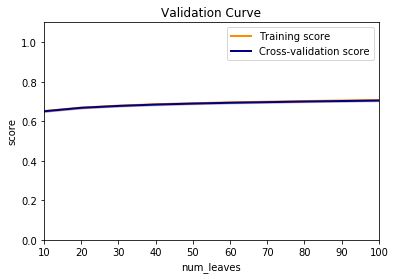

In [31]:
plot_validation_curve(LGBMRegressor(), param_name='num_leaves', param_range=range(10, 101, 10))

### Number of estimators

Second we'll look at the influence of the number of estimators.

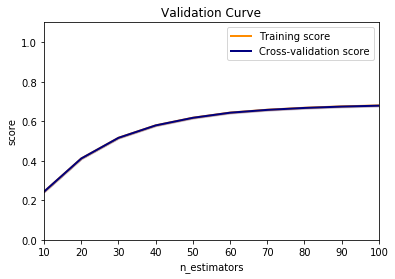

In [30]:
plot_validation_curve(LGBMRegressor(), param_name='n_estimators', param_range=range(10, 101, 10))

### Minimum data in leaf

Last parameter i will inspect is the number of datapoints needed in a leaf. This can help against overfitting.

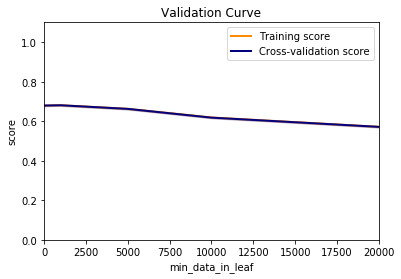

In [34]:
plot_validation_curve(LGBMRegressor(), param_name='min_data_in_leaf', param_range=[1,5,25,100,1000,5000,10000,20000])

So from the above tuning plots we can see that high values of *num_leaves* and *n_estimators* work well, also low values of *min_data_in_leaf* seem to work better. 

## Evaluation

So now we have tuned parameters, so we can evaluate how well the model does now:

In [21]:
from lightgbm import LGBMRegressor

scores = cross_val_score(LGBMRegressor(n_estimators=128, num_leaves=128, min_data_in_leaf=25),
                         X, y, cv=ShuffleSplit(n_splits=5, test_size=0.2))

print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Score: 0.72 (+/- 0.00)


Let's also have a look at feature importance, training progress and predictions.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LGBMRegressor(n_estimators=128, num_leaves=128, min_data_in_leaf=25)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=25, min_split_gain=0.0,
       n_estimators=128, n_jobs=-1, num_leaves=128, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

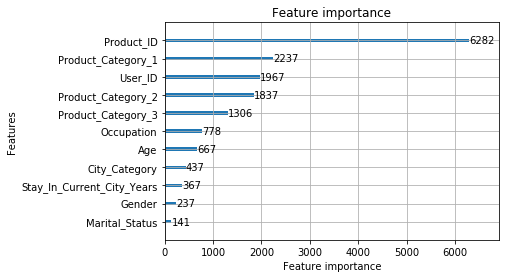

In [50]:
from lightgbm import plot_importance

plot_importance(model)

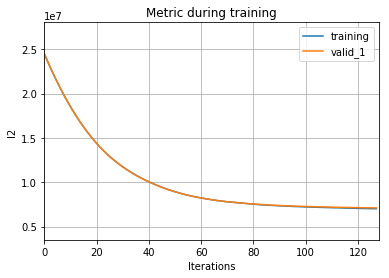

In [52]:
from lightgbm import plot_metric

plot_metric(model)

## Results

So finally, metrics are cool and all, but i'm curious about how good the predictions look to the human eye. Are they close or far off?

In [74]:
df_res = pd.DataFrame({'predictions': model.predict(X.head(n=10)).tolist(), 'actual': y[:10].values.tolist()})
df_res['percentage_error'] = (np.abs(df_res['actual'] - df_res['predictions']) / df_res['actual']) * 100.0

In [75]:
pd.set_option('precision', 0)

df_res

,actual,predictions,percentage_error
0,8370,10412,24
1,15200,15868,4
2,1422,1479,4
3,1057,1480,40
4,7969,7779,2
5,15227,13728,10
6,19215,17328,10
7,15854,14287,10
8,15686,16296,4
9,7871,7162,9
